In [1]:
import cv2
import json
from google.colab.patches import cv2_imshow
import random

# Q2

In [7]:
img = cv2.imread('/content/Melli.jpg')

In [8]:
faces_boxes = []
with open('/content/Melli.json') as f:
    boxes_dict = json.load(f)
    for box in boxes_dict['shapes']:
        box = box['points']
        box[0][0], box[0][1], box[1][0], box[1][1] = int(box[0][0]), int(box[0][1]), int(box[1][0]), int(box[1][1])
        faces_boxes.append(box)

# **Face Boxes**

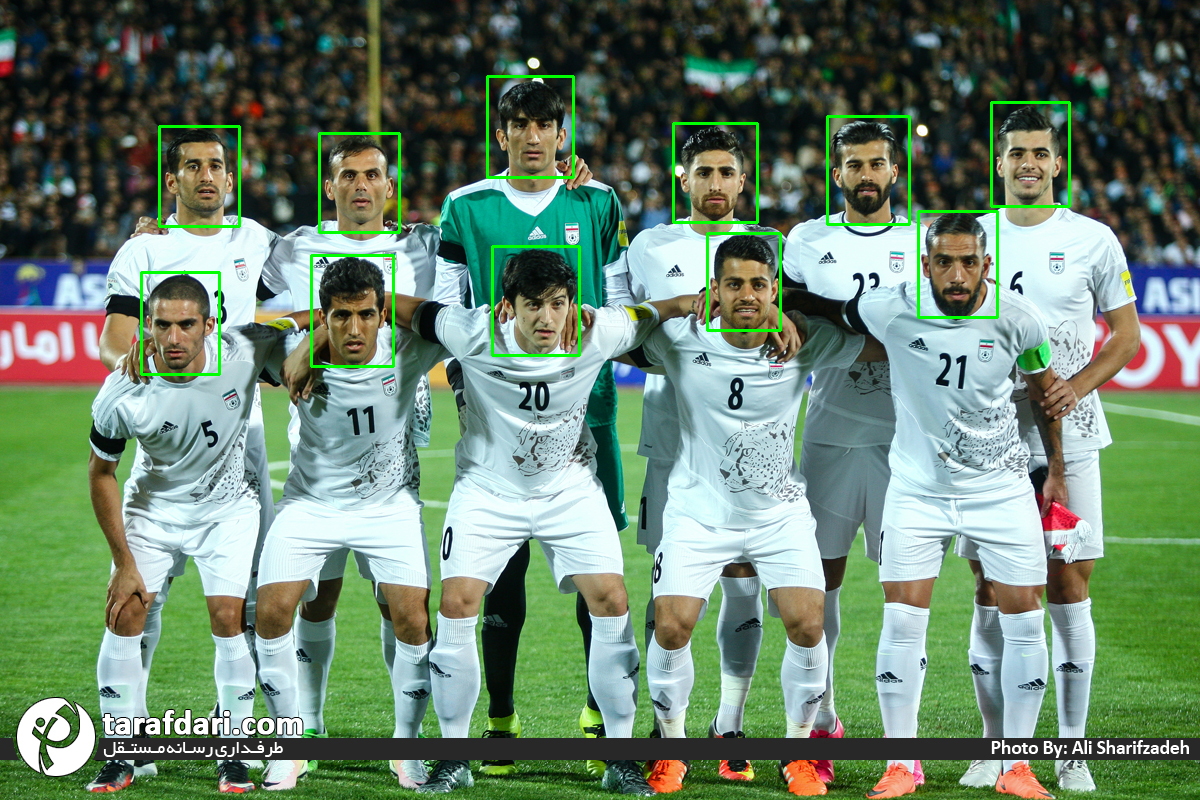

In [10]:
clone = img.copy()
for box in faces_boxes:
    cv2.rectangle(clone, tuple(box[0]), tuple(box[1]), (0, 255, 0), 2)
cv2_imshow(clone)

In [12]:
def IoU(first_box, second_box):
    #check if they have intersection
    if first_box[1][0] <= second_box[0][0] or second_box[1][0] <= first_box[0][0]:
        return 0
    if first_box[0][1] >= second_box[1][1] or first_box[1][1] <= second_box[0][1]:
        return 0
    xA = max(first_box[0][0], second_box[0][0])
    yA = max(first_box[0][1], second_box[0][1])
    xB = min(first_box[1][0], second_box[1][0])
    yB = min(first_box[1][1], second_box[1][1])

    intersection_area = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    first_box_area = (first_box[1][0] - first_box[0][0] + 1) * (first_box[1][1] - first_box[0][1] + 1)
    second_box_area = (second_box[1][0] - second_box[0][0] + 1) * (second_box[1][1] - second_box[0][1] + 1)

    iou = intersection_area / (first_box_area + second_box_area - intersection_area)

    return iou

In [13]:
def sliding_window(image, stepSize, windowSize):
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            if y + windowSize[1] < image.shape[0] and x + windowSize[0] < image.shape[1]:
                yield [[x, y],[x + windowSize[0], y + windowSize[1]]]

In [14]:
for box in faces_boxes:
    width = box[1][0] - box[0][0]
    height = box[1][1] - box[0][1]
    print(f'w : {width}, h: {height}')

w : 78, h: 102
w : 80, h: 99
w : 82, h: 111
w : 86, h: 101
w : 87, h: 109
w : 84, h: 99
w : 73, h: 97
w : 82, h: 108
w : 79, h: 106
w : 78, h: 104
w : 80, h: 100


In [34]:
window = (90, 112)
step_size = 15
face_proposals = []
back_prpposals = []
for box in sliding_window(img, step_size, window):
    has_face = False
    for face_box in faces_boxes:
        iou = IoU(box, face_box)
        temp_backs = []
        if iou >= 0.7:
          face_proposals.append({'box' : box, 'face' : face_box, 'IoU' : iou})
          has_face = True
          break
        elif iou <= 0.1:
          temp_backs.append(box)
    if not has_face and len(temp_backs) != 0:
        back_prpposals.append(temp_backs[0])

In [35]:
clone_1 = clone.copy()
for p in face_proposals:
    cv2.rectangle(clone_1, tuple(p['box'][0]), tuple(p['box'][1]), (0, 0, 255), 2)

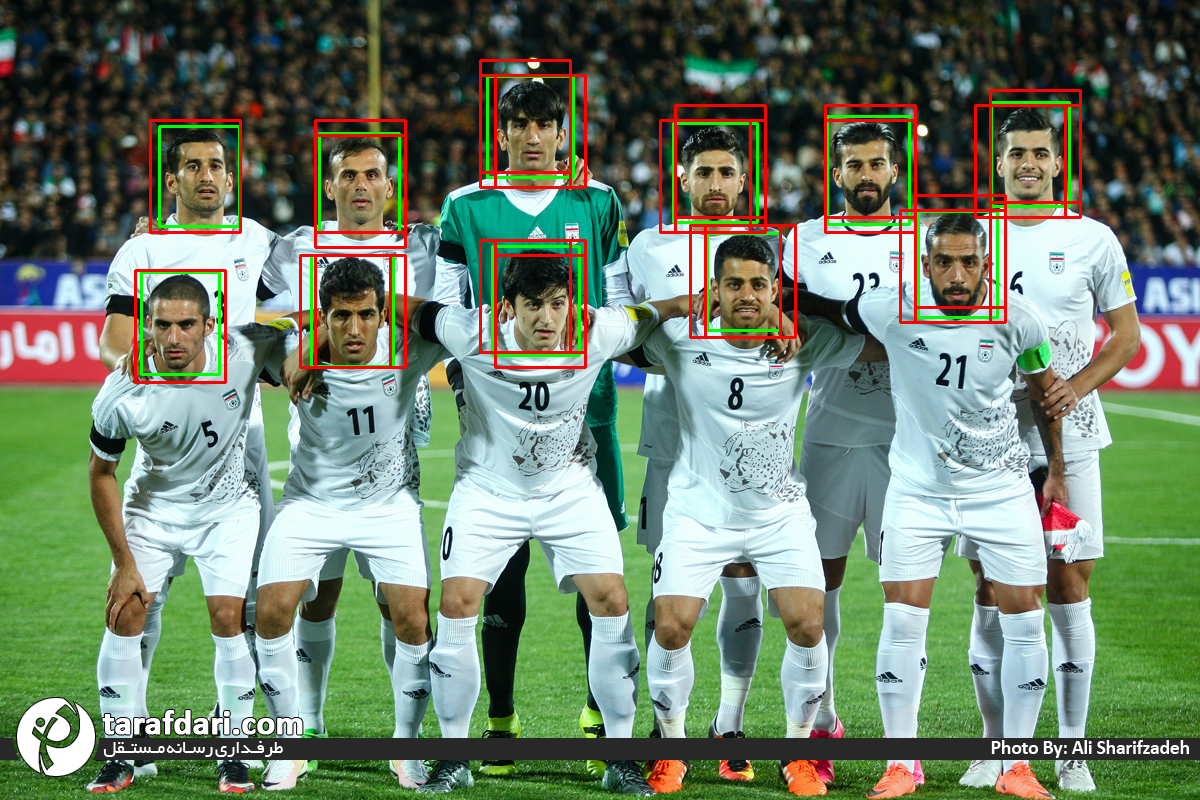

In [36]:
cv2_imshow(clone_1)

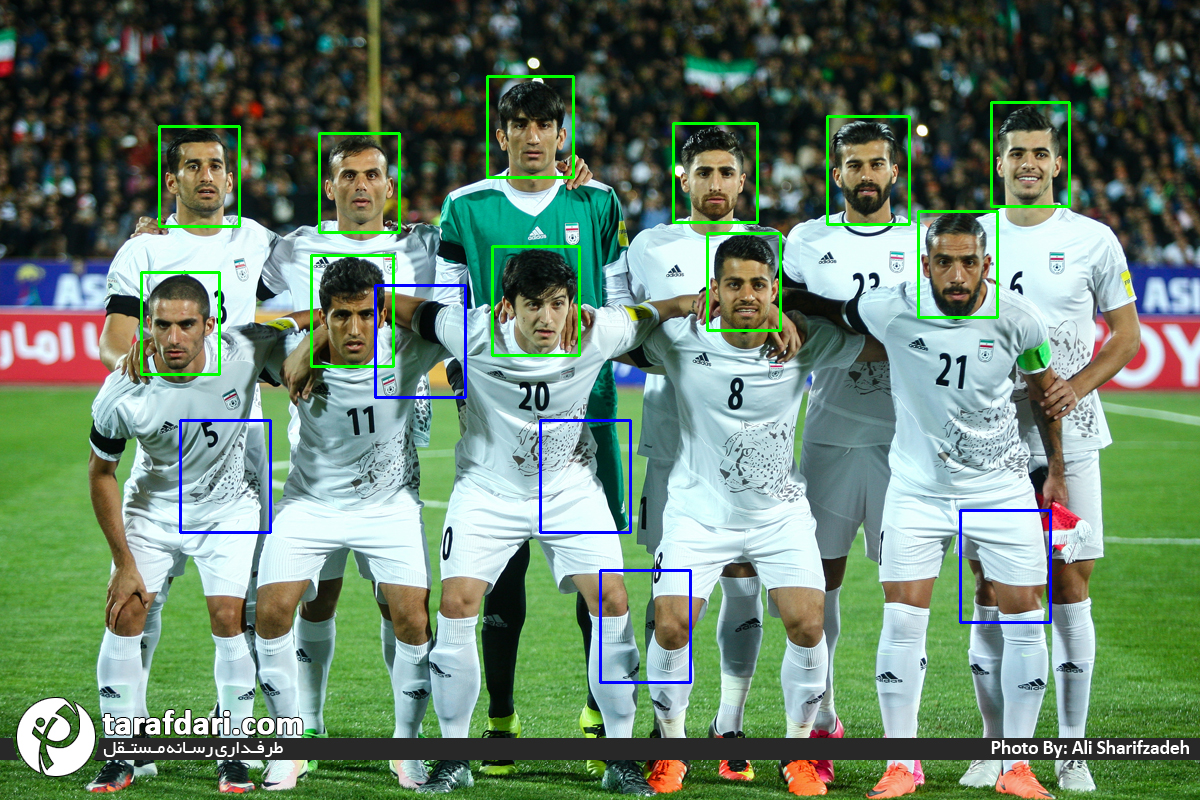

In [37]:
clone_2 = clone.copy()
for p in random.choices(back_prpposals, k=5):
    cv2.rectangle(clone_2, tuple(p[0]), tuple(p[1]), (255, 0, 0), 2)
cv2_imshow(clone_2)

# Q5

In [3]:
from sklearn.metrics import auc
import pandas as pd

In [5]:
def precision(tp , fp):
  return tp / (tp + fp)

def recall(tp, fn):
  return tp / (tp + fn)

In [7]:
df = pd.read_excel('/content/detections.xlsx')

In [17]:
labels_25 = list(df['correct_25'])
prec_25 = []
recall_25 = []
tp = fp = 0
all_true = labels_25.count(True)
for label in labels_25:
  if label == True:
    tp += 1
  else:
    fp += 1
  fn = all_true - tp
  prec_25.append(precision(tp, fp))
  recall_25.append(recall(tp, fn))

In [19]:
prec_25

[1.0, 0.5, 0.3333333333333333, 0.5, 0.4, 0.5, 0.5714285714285714, 0.5]

In [1]:
from sklearn.metrics import auc
x = [0.1, 0.5, 0.8, 0.9]
y = [0.2, 0.3, 0.35, 0.5]
auc(x, y)

0.24